#### 1. LSTM을 이용한 로이터 뉴스 카테고리 분류
---

In [3]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

In [5]:
# 학습셋과 데이터셋 분리
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
import numpy as np

category = np.max(y_train) + 1

print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
from tensorflow.keras.preprocessing import sequence

# 단어의 수 세팅
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [11]:
from tensorflow.keras.utils import to_categorical

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

# 모델 구조 설정
model = Sequential()

model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# 모델 실행 옵션
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.3971 - loss: 2.4615 - val_accuracy: 0.5419 - val_loss: 1.7714
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5341 - loss: 1.7842 - val_accuracy: 0.5539 - val_loss: 1.7222
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5642 - loss: 1.6575 - val_accuracy: 0.5841 - val_loss: 1.6194
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.6068 - loss: 1.5280 - val_accuracy: 0.6376 - val_loss: 1.4653
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6592 - loss: 1.3428 - val_accuracy: 0.6696 - val_loss: 1.2913
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7105 - loss: 1.1411 - val_accuracy: 0.7035 - val_loss: 1.2025
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7371 - loss: 1.0376 - val_accuracy: 0.7110 - val_loss: 1.1529
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7526 - loss: 0

<br>

##### 실습 | LSTM을 이용해 로이터 뉴스 카테고리 분석하기
---

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.3912 - loss: 2.4323 - val_accuracy: 0.5472 - val_loss: 1.7716
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5458 - loss: 1.6959 - val_accuracy: 0.5717 - val_loss: 1.6705
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.5990 - loss: 1.5607 - val_accuracy: 0.6260 - val_loss: 1.4861
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6528 - loss: 1.3426 - val_accuracy: 0.6447 - val_loss: 1.3881
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6899 - loss: 1.2059 - val_accuracy: 0.6857 - val_loss: 1.2295
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7250 - loss: 1.0658 - val_accuracy: 0.6888 - val_loss: 1.2130
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7551 - loss: 0.9765 - val_accuracy: 0.7106 - val_loss: 1.1529
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7880 - loss: 0

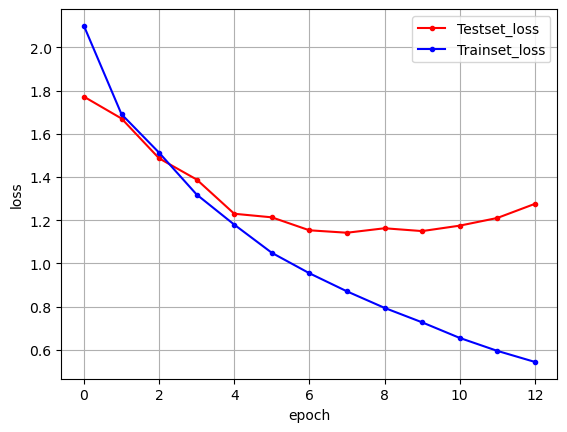

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도
print('\nTest Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<br>

#### 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기
---

In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# 테스트셋 지정
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D

# 모델 구조 설정
model = Sequential()

model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

<br>

##### 실습 | LSTM과 CNN을 조합해 영화 리뷰 분류하기
---

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 88ms/step - accuracy: 0.6798 - loss: 0.5630 - val_accuracy: 0.8843 - val_loss: 0.2858
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9032 - loss: 0.2467 - val_accuracy: 0.8936 - val_loss: 0.2757
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.9308 - loss: 0.1864 - val_accuracy: 0.8944 - val_loss: 0.2623
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9530 - loss: 0.1412 - val_accuracy: 0.8901 - val_loss: 0.2875
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9597 - loss: 0.1170 - val_accuracy: 0.8870 - val_loss: 0.3027
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9722 - loss: 0.0848 - val_accuracy: 0.8891 - val_loss: 0.3262
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8752 - loss: 0.3578
Test Accuracy: 0.8769


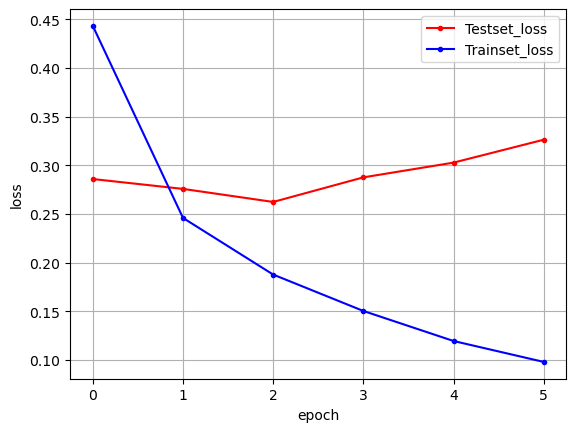

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 테스트셋 지정
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델 구조 설정
model = Sequential()

model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 시각화
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

<br>

#### 3. 어텐션을 사용한 신경망
---

In [2]:
!pip install keras-self-attention

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18918 sha256=8e6ac0e5839d279a251e08fb1fc08fc6b86578e7c6369a45d0ec46550bd36115
  Stored in directory: c:\users\1class_24\appdata\local\pip\cache\wheels\9a\9d\6e\09a0f61c2edeaea9f96fecdc67f31455c363bb44a4ddabe746
Successfully built keras-self-attention


In [ ]:
model.add(SeqSelfAttention(attention_activation='sigmoid'))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1753s 4s/step - accuracy: 0.6962 - loss: 0.5289 - val_accuracy: 0.8728 - val_loss: 0.3109
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1620s 3s/step - accuracy: 0.9150 - loss: 0.2128 - val_accuracy: 0.8779 - val_loss: 0.3041
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1535s 3s/step - accuracy: 0.9489 - loss: 0.1431 - val_accuracy: 0.8906 - val_loss: 0.3128
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1547s 3s/step - accuracy: 0.9655 - loss: 0.0953 - val_accuracy: 0.8886 - val_loss: 0.3613
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1533s 3s/step - accuracy: 0.9801 - loss: 0.0557 - val_accuracy: 0.8781 - val_loss: 0.5133
782/782 ━━━━━━━━━━━━━━━━━━━━ 646s 826ms/step - accuracy: 0.8643 - loss: 0.5632
Test Accuracy: 0.8640


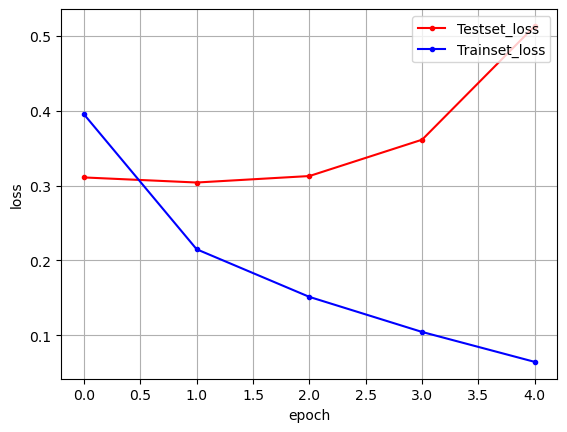

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Embedding, LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from keras_self_attention import SeqSelfAttention

import numpy as np
import matplotlib.pyplot as plt

# 테스트셋 지정
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델 구조 설정
model = Sequential()

model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 시각화
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()